In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
trainSet = np.random.uniform(-1,1,(1500,2))

In [3]:
alpha = 0.1
sigma = 1
epochs = 50000
reduce = epochs/2
weights = 2 * (np.random.ranf((10, 10, 2)) - 0.5) 
kohonenNet = np.zeros((10,10))
neighX = np.array([0,1,2,3,4,5,6,7,8,9]) 
neighY = np.array([0,1,2,3,4,5,6,7,8,9])

In [4]:
def bestNeuron(neuron,weights,kohonenNet):
    s = np.subtract(neuron,weights)
    for i in range(s.shape[0]):
        for j in range(s.shape[1]):
            kohonenNet[i][j] = np.sqrt(np.sum(s[i][j]**2))
    return (np.unravel_index(kohonenNet.argmin(),kohonenNet.shape))

def mexicanHatFunc(neighX,neighY,sigma2,neuronInd):
    denom = 2 * np.pi * (sigma2**2) 
    xpoints = np.exp(-1 * np.square(neighX - neuronInd[0]) / denom) 
    ypoints = np.exp(-1 * np.square(neighY - neuronInd[1]) / denom) 
    neighPoints = np.outer(xpoints, ypoints) 
    return neighPoints

def update(neuronInd,neuron,ite,reduce,neighX,neighY,weights,alpha,sigma):
    alpha2 = alpha/(1 + ite / reduce) 
    sigma2 = sigma / (1 + ite / reduce) 
    
    neighPoints = mexicanHatFunc(neighX,neighY,sigma2,neuronInd) 
    
    iterator = np.nditer(neighPoints, flags = ['multi_index']) 
    while not iterator.finished :
        weights[iterator.multi_index] += alpha2 * neighPoints[iterator.multi_index] * (neuron - weights[iterator.multi_index]) 
        iterator.iternext() 
    return weights

def plotterFunc(weights):
    xplt = list()
    yplt = list()
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            xplt.append(weights[i][j][0])
            yplt.append(weights[i][j][1])
    plt.title('Distribution of neurons')
    plt.scatter(xplt, yplt)
    plt.show()
    plt.close()

def euclidean(coor,neuron):
    return np.sqrt(np.sum((np.subtract(coor,neuron))**2))

def testFunc(testSet):
    for i in range(testSet.shape[0]): 
        neuron = bestNeuron(testSet[i],weights,kohonenNet)  
        xCoor = weights[neuron[0]][neuron[1]][0]
        yCoor = weights[neuron[0]][neuron[1]][1]
        distance = euclidean(np.array([xCoor,yCoor]),testSet[i])
        print("The acitvated neuron is : ",weights[neuron]," and the distance from neuron is : ",distance)

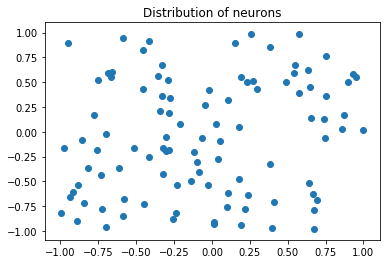

100 iterations completed
1000 iterations completed
10000 iterations completed
20000 iterations completed
30000 iterations completed
40000 iterations completed
50000 iterations completed


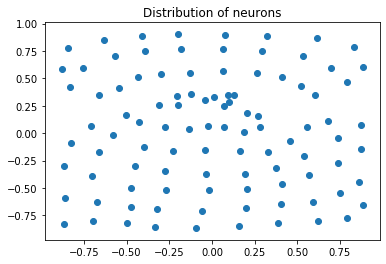

In [5]:
plotterFunc(weights)
for iteration in range(1, epochs + 1):
    np.random.shuffle(trainSet)
    ind = np.random.randint(0,1500)
    index = bestNeuron(trainSet[ind],weights,kohonenNet)
    weights = update(index,trainSet[ind],iteration,reduce,neighX,neighY,weights,alpha,sigma)
    if iteration%10000 == 0 or iteration == 100 or iteration == 1000:
        print(iteration,"iterations completed")
plotterFunc(weights)

In [6]:
testSet = np.array([[0.1, 0.8], [0.5, -0.2], [-0.8, -0.9], [-0.6, 0.9]])  
testFunc(testSet)

The acitvated neuron is :  [0.06460155 0.77201296]  and the distance from neuron is :  0.04512565317519476
The acitvated neuron is :  [ 0.54213467 -0.20717315]  and the distance from neuron is :  0.04274090259380859
The acitvated neuron is :  [-0.8673442  -0.83145361]  and the distance from neuron is :  0.09609291760527439
The acitvated neuron is :  [-0.63003791  0.84936673]  and the distance from neuron is :  0.058872777006240856
